In [39]:
import pandas as pd
import json
import os 
import sys

# plot
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
dir = os.path.join('dataset', 'kaggle-dse')

files = os.listdir(dir)
files.sort()
files = [f for f in files if f not in ['securities.json', 'prices_2008.json']]
print(files)

['prices_2009.json', 'prices_2010.json', 'prices_2011.json', 'prices_2012.json', 'prices_2013.json', 'prices_2014.json', 'prices_2015.json', 'prices_2016.json', 'prices_2017.json', 'prices_2018.json', 'prices_2019.json', 'prices_2020.json', 'prices_2021.json', 'prices_2022.json']


In [41]:
# load all the json files
data = []
for f in files:
    with open(os.path.join(dir, f)) as file:
        data.append(json.load(file))
len(data)

14

In [42]:
# convert to pandas dataframe
dfs = []
for i in range(1,len(data)):
    dfs.append(pd.DataFrame(data[i]))
df = pd.concat(dfs)

In [43]:
df.shape

(1612197, 11)

In [44]:
df.head()

,date,trading_code,last_traded_price,high,low,opening_price,closing_price,yesterdays_closing_price,trade,value_mn,volume
0,2010-12-30 00:00:00,1JANATAMF,12.9,13.9,12.3,12.3,13.0,12.0,4708,124.8680,9623500
1,2010-12-29 00:00:00,1JANATAMF,11.8,12.3,11.2,11.7,12.0,11.3,1680,46.8126,3987000
2,2010-12-28 00:00:00,1JANATAMF,11.3,11.7,11.0,11.0,11.3,11.2,1077,19.3689,1698500
3,2010-12-27 00:00:00,1JANATAMF,11.3,11.5,11.0,11.5,11.2,11.4,932,13.9884,1249000
4,2010-12-26 00:00:00,1JANATAMF,11.6,11.8,11.2,11.6,11.4,11.5,1671,31.8171,2746500


In [45]:
# count the unique values in the column
df = df.drop_duplicates(subset=['date', 'trading_code'])
df['trading_code'].value_counts()

trading_code
GP            3090
SANDHANINS    3090
ICBIBANK      3090
SAMORITA      3090
IDLC          3090
              ... 
TB2Y1024        40
GIB             31
TB5Y1127        11
IICICL          11
ICICL            9
Name: count, Length: 954, dtype: int64

In [46]:
top_companies = [
    "GP",
    "BATBC",
    "SQURPHARMA",
    "RENATA",
    "BEXIMCO",
    "BERGERPBL",
    "MARICO",
    "BRACBANK",
    "BXPHARMA",
    "ISLAMIBANK",
    "DUTCHBANGL",
    "EBL",
    "POWERGRID",
    "SUMITPOWER",
    "OLYMPIC",
    "PUBALIBANK",
    "CITYBANK",
    "ALARABANK",
    "PRIMEBANK",
    "IFIC",
    "RECKITTBEN",
    "NBL",
    "BSRMSTEEL",
    "BANKASIA",
    "SHAHJABANK",
    "MPETROLEUM",
    "LINDEBD",
    "BSC",
    "JAMUNAOIL",
    "PADMAOIL",
]

len(top_companies)

30

In [47]:
df = df[df['trading_code'].isin(top_companies)]

df['date'].value_counts()

date
2010-12-30 00:00:00    30
2018-07-17 00:00:00    30
2018-06-05 00:00:00    30
2018-06-04 00:00:00    30
2018-06-03 00:00:00    30
                       ..
2014-08-24 00:00:00    30
2014-08-21 00:00:00    30
2014-08-20 00:00:00    30
2014-08-19 00:00:00    30
2022-01-02 00:00:00    30
Name: count, Length: 3090, dtype: int64

In [48]:
df['trading_code'].value_counts()

trading_code
ALARABANK     3090
BANKASIA      3090
SQURPHARMA    3090
SHAHJABANK    3090
RENATA        3090
RECKITTBEN    3090
PUBALIBANK    3090
PRIMEBANK     3090
POWERGRID     3090
PADMAOIL      3090
OLYMPIC       3090
NBL           3090
MPETROLEUM    3090
MARICO        3090
LINDEBD       3090
JAMUNAOIL     3090
ISLAMIBANK    3090
IFIC          3090
GP            3090
EBL           3090
DUTCHBANGL    3090
CITYBANK      3090
BXPHARMA      3090
BSRMSTEEL     3090
BSC           3090
BRACBANK      3090
BEXIMCO       3090
BERGERPBL     3090
BATBC         3090
SUMITPOWER    3090
Name: count, dtype: int64

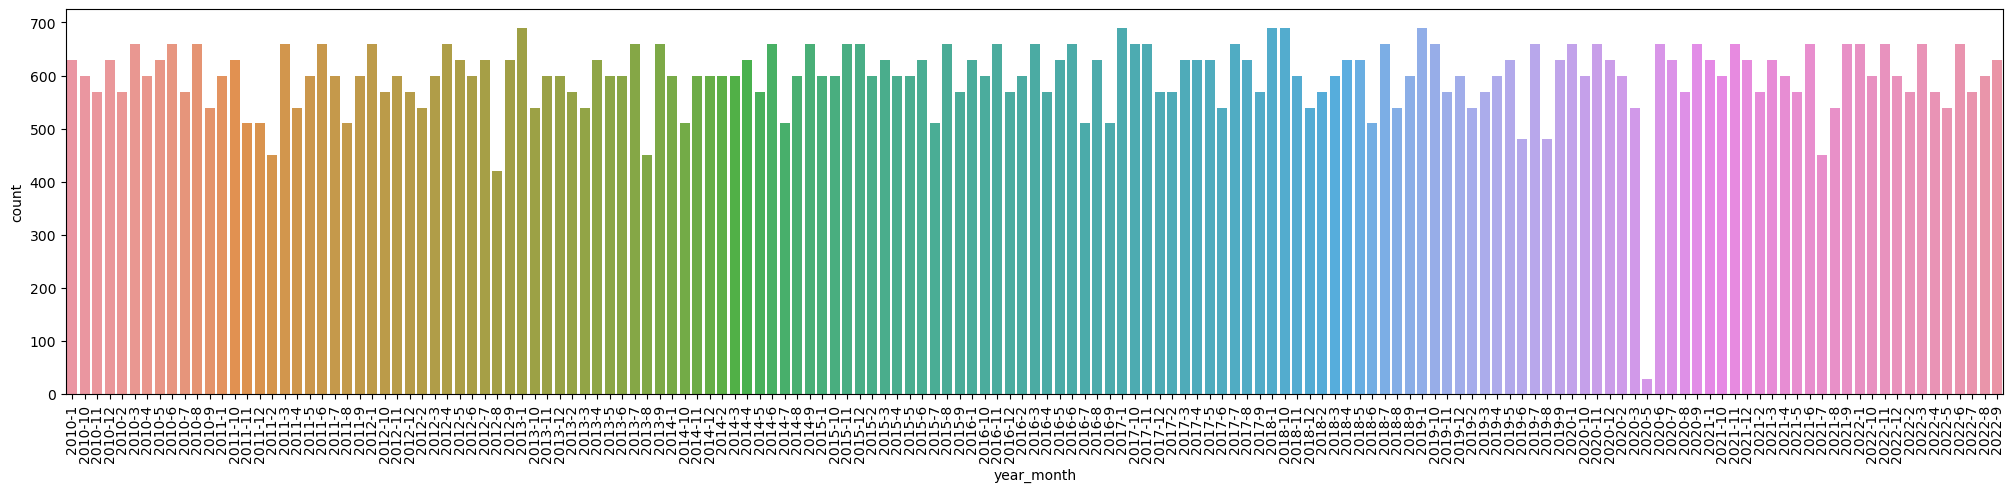

In [49]:
# per year minimum number of trading days
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Create a new column 'year_month' for plotting
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str)

plt.figure(figsize=(25, 5))
sns.countplot(x='year_month', data=df, order=sorted(df['year_month'].unique()))
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [50]:
# print the zero count of each column
zero_counts = df.apply(lambda x: (x==0).sum())
print(zero_counts)

date                           0
trading_code                   0
last_traded_price           1469
high                        1469
low                         1469
opening_price                522
closing_price                 29
yesterdays_closing_price       0
trade                       1472
value_mn                    1493
volume                      1472
year                           0
month                          0
year_month                     0
dtype: int64


In [51]:
# Calculate the mean values of each month for the columns high, low, opening, and closing
# mean_values = df.groupby(['year', 'month', 'trading_code'])[['high', 'low', 'opening', 'closing']].mean()
# Replace the zero values with the mean values
new_df = df.copy()
new_df[['high', 'low', 'opening_price', 'closing_price']] = \
        new_df.groupby(['year', 'month', 'trading_code'])[['high', 'low', 'opening_price', 'closing_price']].transform(lambda x: x.replace(0, x.mean()))

# Verify the changes
# print the zero count of each column
zero_counts = new_df.apply(lambda x: (x==0).sum())
print(zero_counts)

date                           0
trading_code                   0
last_traded_price           1469
high                         312
low                          312
opening_price                 17
closing_price                  0
yesterdays_closing_price       0
trade                       1472
value_mn                    1493
volume                      1472
year                           0
month                          0
year_month                     0
dtype: int64


In [52]:
new_df[['high', 'low', 'opening_price', 'closing_price']] = \
        new_df.groupby(['year', 'trading_code'])[['high', 'low', 'opening_price', 'closing_price']].transform(lambda x: x.replace(0, x.mean()))

# Verify the changes
# print the zero count of each column
zero_counts = new_df.apply(lambda x: (x==0).sum())
print(zero_counts)

date                           0
trading_code                   0
last_traded_price           1469
high                           0
low                            0
opening_price                  0
closing_price                  0
yesterdays_closing_price       0
trade                       1472
value_mn                    1493
volume                      1472
year                           0
month                          0
year_month                     0
dtype: int64


In [107]:
df = new_df.copy()

In [108]:
df['year'].value_counts()

year
2017    7440
2010    7320
2015    7320
2022    7320
2018    7260
2016    7230
2021    7200
2013    7140
2014    7140
2012    7110
2019    7110
2011    6870
2020    6240
Name: count, dtype: int64

In [114]:
# df['date'] = pd.to_datetime(df['date'])

# Create an empty DataFrame to store the sampled data
sampled_data = pd.DataFrame()

# Group the data by year
grouped_data = df.groupby('year')

# Sample 200 days for each year
for year, group in grouped_data:
    # Sample 200 unique days
    for t, g in group.groupby('trading_code'):
        sampled_days = g['date'].sample(208, replace=False)
        break
    # check the number of unique days
    print(len(sampled_days.unique()))
    
    # Filter the data for the sampled days
    sampled_year_data = group[group['date'].isin(sampled_days)]
    # print(len(sampled_year_data))
    
    # Ensure each sampled day includes all 30 trading codes
    sampled_year_data = sampled_year_data.groupby('date').filter(lambda x: len(x) == 30)
    
    # Append the sampled data to the final DataFrame
    sampled_data = pd.concat([sampled_data, sampled_year_data])

# Reset index of the final sampled data
sampled_data.reset_index(drop=True, inplace=True)

208
208
208
208
208
208
208
208
208
208
208
208
208


In [115]:
sampled_data['year'].value_counts()

year
2010    6240
2011    6240
2012    6240
2013    6240
2014    6240
2015    6240
2016    6240
2017    6240
2018    6240
2019    6240
2020    6240
2021    6240
2022    6240
Name: count, dtype: int64

In [116]:
df = sampled_data.copy()